# Toolkit

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
from datasist.structdata import detect_outliers

from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, silhouette_samples 

# Import and Inspect Data

In [2]:
df = pd.read_csv(r"College_Data.csv")
df.head()

,University,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   University   777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F.Undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  Room.Board   777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    int64  
 14  Terminal     777 non-null    int64  
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad.Rate    777 non-null    int64  
dtypes: float

In [4]:
# random sample
df.sample(5)

,University,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
172,Drew University,Yes,2153,1580,321,56,84,1192,87,18432,5616,520,660,93,97,10.2,28,14907,83
763,Williams College,Yes,4186,1245,526,81,96,1988,29,19629,5790,500,1200,94,99,9.0,64,22014,99
86,Carleton College,Yes,2694,1579,489,75,93,1870,12,19292,3957,550,550,81,93,10.4,60,17960,91
269,Illinois State University,No,8681,6695,2408,10,35,15701,1823,7799,3403,537,2605,77,84,21.0,16,5569,54
462,Queens College,Yes,516,392,154,32,62,630,549,11020,4970,610,1900,73,75,14.0,36,9315,58


# Preprocessing

In [5]:
# nulls
df.isna().sum()

University     0
Private        0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

In [6]:
# duplicates
df.duplicated().sum()

0

In [7]:
df.columns

Index(['University', 'Private', 'Apps', 'Accept', 'Enroll', 'Top10perc',
       'Top25perc', 'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board',
       'Books', 'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni',
       'Expend', 'Grad.Rate'],
      dtype='object')

In [8]:
df.drop(['University'], axis=1, inplace=True)

# EDA

In [9]:
# sns.pairplot(df)

C:\Users\shehab\AppData\Local\Temp\ipykernel_17588\3650396268.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap((df.corr()), annot=True, fmt='.2f')


<Axes: >

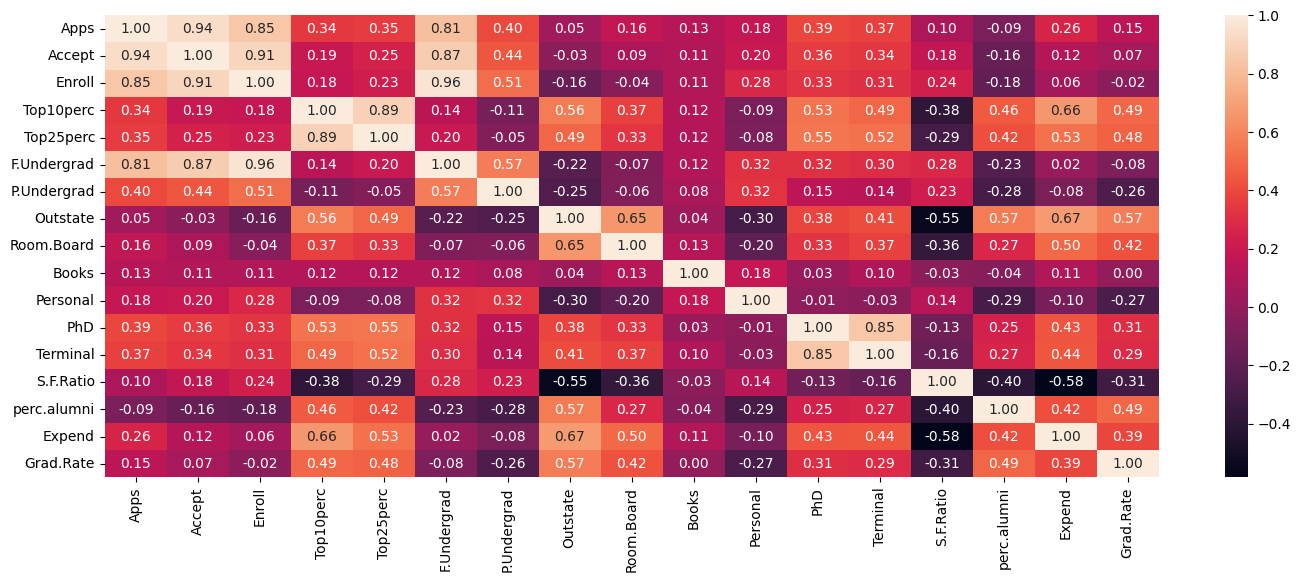

In [10]:
plt.figure(figsize=(17, 6))
sns.heatmap((df.corr()), annot=True, fmt='.2f')

# Outliers

In [11]:
numeric_cols = df.select_dtypes(exclude='O')
numeric_cols.columns

Index(['Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc', 'F.Undergrad',
       'P.Undergrad', 'Outstate', 'Room.Board', 'Books', 'Personal', 'PhD',
       'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend', 'Grad.Rate'],
      dtype='object')

In [12]:
indices = detect_outliers(df, 0, [numeric_cols.columns])
(len(indices)/df.shape[0])*100

100.0

# Encoding and scaling

In [13]:
df_encoded = pd.get_dummies(df, columns=['Private'], drop_first=True)
df_encoded.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Private_Yes
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
2,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
3,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
4,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1


In [14]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)

# Models

In [15]:
inertia = []
for n in range(1, 25):
    model = KMeans(n_clusters=n, random_state=0)
    model.fit(df_scaled)
    inertia.append(model.inertia_)

C:\Users\shehab\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\shehab\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\shehab\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\shehab\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warni

In [16]:
inertia

[13986.0,
 11114.277674353794,
 8739.612373228018,
 7788.5672569818635,
 7038.881370416143,
 6690.679862918359,
 6412.358227866766,
 6172.144503257408,
 5979.332107911418,
 5779.427585862696,
 5600.435508087076,
 5439.948268663037,
 5312.526360875299,
 5188.490845808036,
 5068.698990703837,
 4953.051838275998,
 4878.851523146595,
 4808.488378803692,
 4727.836522320116,
 4636.867015511033,
 4562.582362374584,
 4505.165761168587,
 4444.499283418068,
 4368.846994130584]

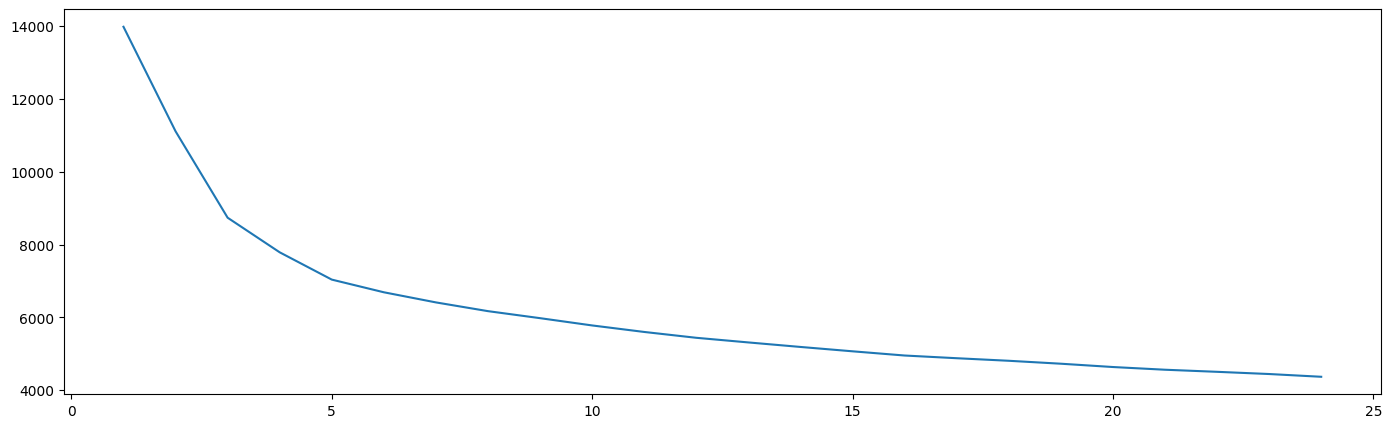

In [17]:
plt.figure(figsize=(17, 5))
plt.plot(range(1, 25), inertia)

# KMeans ++

In [18]:
inertia = []
for n in range(1, 25):
    model = KMeans(n_clusters=n, init='k-means++', random_state=0)
    model.fit(df_scaled)
    inertia.append(model.inertia_)

C:\Users\shehab\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\shehab\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\shehab\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\shehab\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warni

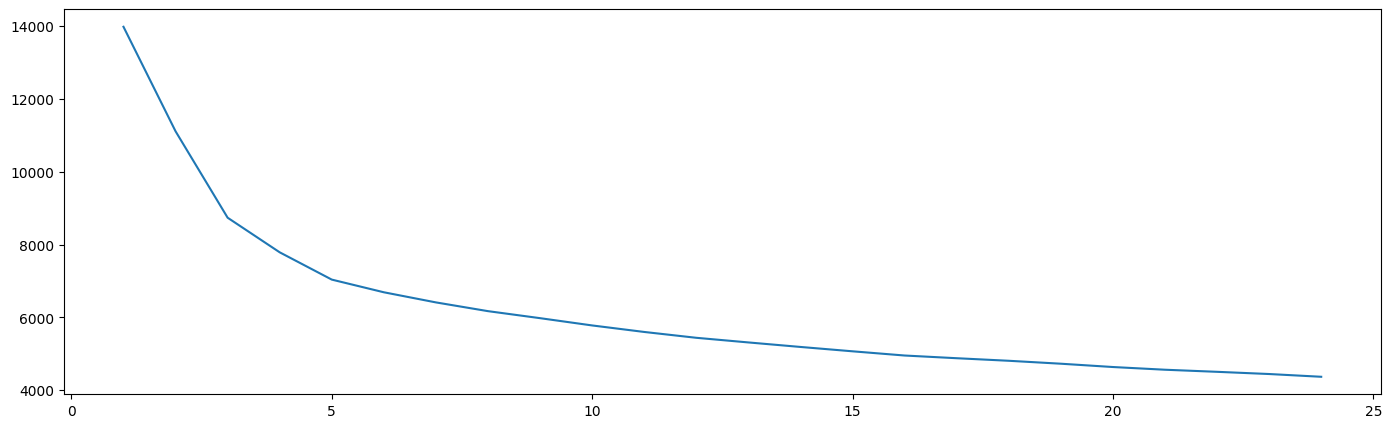

In [19]:
plt.figure(figsize=(17, 5))
plt.plot(range(1, 25), inertia)

In [20]:
# so let it be 13
KM_model = KMeans(n_clusters=13)
KM_model.fit(df_scaled)

C:\Users\shehab\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=13)

In [21]:
# Get cluster labels
labels = KM_model.labels_
labels

array([ 8,  2,  3,  1,  8,  8, 10,  9,  9,  2,  1,  1,  9,  9,  2, 10,  6,
        3,  2,  7,  1, 12,  3,  5,  9,  7, 10, 11,  3,  9,  9,  9,  8,  8,
        0,  3,  1,  1, 10, 11, 10,  9,  8,  8,  9,  7,  8,  3, 10,  8,  8,
        8,  8,  2,  9,  9, 12,  8,  8,  4,  6, 11, 10,  0,  1, 10,  8,  3,
       10, 11,  6,  1,  1,  9,  9, 10, 10, 10, 11, 12,  9,  8,  8, 10,  9,
        3,  1,  6,  9,  3,  8,  1,  7,  8, 10,  3, 10,  3,  8,  9,  2,  9,
        7, 12, 12,  8,  1, 10,  9,  9,  9,  8,  7,  8,  1,  1,  3,  0, 11,
        7,  9, 10,  1,  1, 10, 12,  3, 10,  8, 10,  9,  9, 10, 10,  3,  3,
        9,  1,  1,  1,  1, 11,  8,  9,  6,  8,  8,  8,  3,  1,  9,  9,  0,
        3,  3,  8,  3,  3,  6,  1,  3,  7,  1,  1,  1,  7,  8,  8,  2,  8,
        8,  0,  1,  9,  6,  1, 11, 12,  8,  3,  7,  7,  3,  3,  9,  9, 10,
       10,  8,  2,  9,  6, 12,  9,  9,  7,  0,  7,  8,  8,  0,  5,  8, 11,
        3,  0, 12,  7,  3,  9,  3,  8,  8,  1,  3,  8, 10,  3, 12,  0,  8,
        6, 11,  5,  3,  1

In [22]:
# Compute the silhouette score
silhouette_avg = silhouette_score(df_scaled, labels)
silhouette_avg

0.11416338715702817

In [23]:
clusters = model.predict(df_scaled)
clusters

array([ 0, 22, 19, 14, 21,  0, 13,  4,  4,  9,  4,  4,  0,  4,  9, 11, 14,
       19, 21, 10,  4, 18, 19,  8,  4, 10, 13,  7, 19,  4,  0,  4, 12,  0,
        2, 19, 14, 14, 11,  7, 13,  2, 21,  0,  4, 10, 11, 19,  6,  0, 21,
        0, 21,  9,  4,  0, 10, 12,  0,  8, 14,  7, 11, 16, 14, 11, 21, 19,
       13,  7,  3, 14, 14,  0, 13, 11, 11, 11,  7, 18, 13, 12, 12, 11, 13,
        9, 14,  3, 13,  0, 11, 14,  1, 21,  6, 19, 13, 19, 21,  0, 16,  4,
        1, 18,  1, 12, 14, 11,  4, 13,  4,  0,  1, 21, 14,  4, 19,  6,  7,
       10, 13, 13, 14, 14, 13, 18, 19, 13, 21, 13, 13, 13, 13,  2, 19, 19,
        0, 14, 15,  4, 14,  7, 21,  0,  3, 21, 21,  0, 19, 14,  0,  4,  6,
       19, 12,  0, 19, 12,  3, 14, 19, 10,  4,  4,  4, 10,  0,  0,  9,  0,
       21,  6, 14,  4,  3,  4,  7, 18, 21, 19,  1, 10, 19, 12,  4, 13, 11,
       13, 11,  9, 13,  3, 15,  4,  0,  1,  6, 10, 21, 12,  6, 17, 11,  5,
       12,  6, 18, 10, 12,  0, 12,  0,  0,  4, 19, 21, 11, 19, 18,  6,  0,
        3,  5, 17, 19,  4

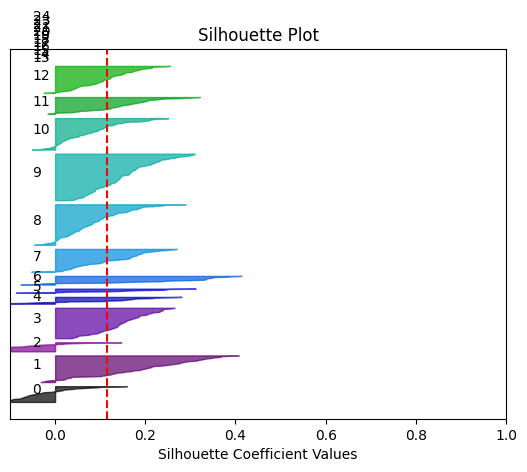

In [24]:
sample_silhouette_values = silhouette_samples(df_scaled, labels)

fig, ax = plt.subplots(1, 1)
y_lower = 10

n_clusters = 25

for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.nipy_spectral(float(i) / n_clusters)
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10


ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.set_yticks([])
ax.set_xlim([-0.1, 1])
plt.title('Silhouette Plot')
plt.xlabel('Silhouette Coefficient Values')
plt.show()

# Agglomerative

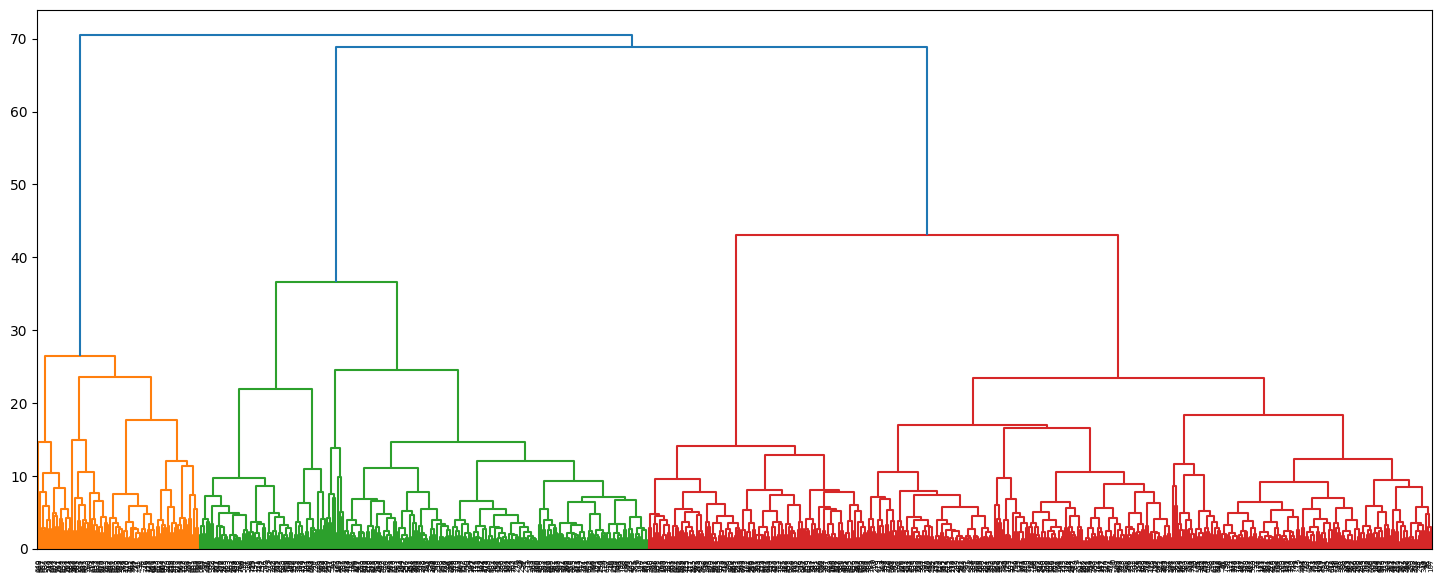

In [25]:
plt.figure(figsize=(18, 7))
dendogram = sch.dendrogram(sch.linkage(df_scaled, method='ward'))

In [26]:
Agglo_model = AgglomerativeClustering(n_clusters=3)
Agglo_model.fit(df_scaled)

AgglomerativeClustering(n_clusters=3)

In [27]:
clusters = Agglo_model.labels_
clusters

array([0, 0, 0, 2, 0, 0, 2, 2, 2, 0, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0,
       0, 1, 2, 0, 2, 1, 0, 2, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0,
       2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 2, 1, 0, 2, 2, 0,
       0, 0, 0, 1, 2, 2, 2, 0, 2, 0, 2, 0, 1, 1, 0, 0, 0, 2, 0, 0, 2, 2,
       2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0,
       2, 0, 0, 0, 2, 2, 0, 2, 1, 0, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0,
       0, 2, 0, 0, 0, 2, 1, 2, 2, 1, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 2, 0,
       0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2,
       1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0,
       0, 0, 2, 1, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1,
       0, 2, 1, 1, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0,
       2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 2, 1, 2, 0, 0, 0, 1, 0, 2, 1, 2, 1, 0, 0, 0, 2, 2, 0,
       0, 2, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0,

In [28]:
Agglo_model.fit_predict(df_scaled)

array([0, 0, 0, 2, 0, 0, 2, 2, 2, 0, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0,
       0, 1, 2, 0, 2, 1, 0, 2, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0,
       2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 2, 1, 0, 2, 2, 0,
       0, 0, 0, 1, 2, 2, 2, 0, 2, 0, 2, 0, 1, 1, 0, 0, 0, 2, 0, 0, 2, 2,
       2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0,
       2, 0, 0, 0, 2, 2, 0, 2, 1, 0, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0,
       0, 2, 0, 0, 0, 2, 1, 2, 2, 1, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 2, 0,
       0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2,
       1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0,
       0, 0, 2, 1, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1,
       0, 2, 1, 1, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0,
       2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 2, 1, 2, 0, 0, 0, 1, 0, 2, 1, 2, 1, 0, 0, 0, 2, 2, 0,
       0, 2, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0,

In [29]:
df_encoded['cluster'] = clusters

# Classification

In [30]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, VotingClassifier
from xgboost import XGBClassifier

from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFECV

# Splitting and Scaling

In [31]:
x = df_encoded.drop(['cluster'], axis=1)
x.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Private_Yes
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
2,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
3,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
4,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1


In [32]:
y = df_encoded['cluster']
y 

0      0
1      0
2      0
3      2
4      0
      ..
772    0
773    0
774    0
775    2
776    0
Name: cluster, Length: 777, dtype: int64

In [33]:
# scaling
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-3.46881819e-01, -3.21205453e-01, -6.35089011e-02, ...,
        -5.01910084e-01, -3.18251941e-01,  6.12553050e-01],
       [-2.10884040e-01, -3.87029908e-02, -2.88584214e-01, ...,
         1.66109850e-01, -5.51261842e-01,  6.12553050e-01],
       [-4.06865631e-01, -3.76317928e-01, -4.78121319e-01, ...,
        -1.77289956e-01, -6.67766793e-01,  6.12553050e-01],
       ...,
       [-2.33895071e-01, -4.23771558e-02, -9.15087008e-02, ...,
        -2.56241250e-01, -9.59029170e-01,  6.12553050e-01],
       [ 1.99171118e+00,  1.77256262e-01,  5.78332661e-01, ...,
         5.88797079e+00,  1.95359460e+00,  6.12553050e-01],
       [-3.26765760e-03, -6.68715889e-02, -9.58163623e-02, ...,
        -9.87115613e-01,  1.95359460e+00,  6.12553050e-01]])

In [34]:
# splitting
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.33, stratify=y, random_state=0)
x_train

array([[ 0.31423286,  0.4413879 ,  0.97571443, ..., -1.0216089 ,
        -0.90077669, -1.63251167],
       [-0.61836028, -0.63595892, -0.63642788, ..., -0.29360897,
        -0.08524204,  0.61255305],
       [-0.53277992, -0.50899611, -0.60950499, ..., -0.20795065,
        -0.60951432,  0.61255305],
       ...,
       [-0.70368208, -0.76577942, -0.75488857, ..., -0.92387793,
         1.42932232,  0.61255305],
       [-0.41384651, -0.31834777, -0.18843108, ..., -0.81848178,
        -1.71631135, -1.63251167],
       [ 1.30913677,  1.32196277,  1.63801739, ..., -0.39536416,
         0.43903024, -1.63251167]])

# Feature Selection

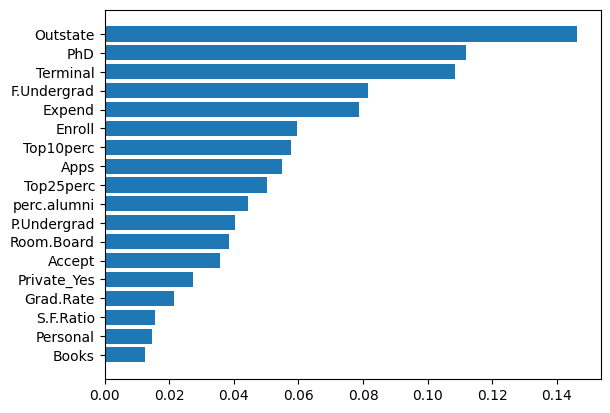

In [35]:
RF = RandomForestClassifier()
RF.fit(x_train, y_train)

f_i = list(zip(df_encoded.drop(['cluster'], axis=1), RF.feature_importances_))
f_i.sort(key= lambda x : x[1])
plt.barh([x[0] for x in f_i], [x[1] for x in f_i])

plt.show()

In [36]:
f_i.reverse()

In [37]:
features = []
for feature in f_i[:14]:
    features.append(feature[0])

features

['Outstate',
 'PhD',
 'Terminal',
 'F.Undergrad',
 'Expend',
 'Enroll',
 'Top10perc',
 'Apps',
 'Top25perc',
 'perc.alumni',
 'P.Undergrad',
 'Room.Board',
 'Accept',
 'Private_Yes']

In [38]:
x = df_encoded[features]
x.head()

,Outstate,PhD,Terminal,F.Undergrad,Expend,Enroll,Top10perc,Apps,Top25perc,perc.alumni,P.Undergrad,Room.Board,Accept,Private_Yes
0,7440,70,78,2885,7041,721,23,1660,52,12,537,3300,1232,1
1,12280,29,30,2683,10527,512,16,2186,29,16,1227,6450,1924,1
2,11250,53,66,1036,8735,336,22,1428,50,30,99,3750,1097,1
3,12960,92,97,510,19016,137,60,417,89,37,63,5450,349,1
4,7560,76,72,249,10922,55,16,193,44,2,869,4120,146,1


# High Correlation feature

In [39]:
# x_encoded = df_encoded.drop(['cluster'], axis=1)
# correlation_matrix = x_encoded.corr().abs()

# # Create a mask to identify highly correlated features
# mask = (correlation_matrix >= 0.8) & (correlation_matrix < 1.0)

# # Identify columns to drop
# columns_to_drop = [column for column in mask.columns if any(mask[column])]

# # Drop the highly correlated features
# x_after_HCF = x_encoded.drop(columns=columns_to_drop)
# len(x_after_HCF.columns)

In [40]:
x_scaled = scaler.fit_transform(x)

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.33, stratify=y, random_state=0)
x_train

array([[-1.57611853,  1.30777263,  1.37955961, ...,  0.92927233,
         0.4413879 , -1.63251167],
       [-0.55732123, -0.59201142, -0.72743756, ..., -0.96490473,
        -0.63595892,  0.61255305],
       [ 0.23612686,  0.26595557,  0.1561419 , ...,  0.84168033,
        -0.50899611,  0.61255305],
       ...,
       [-1.20650603, -1.20484498, -1.13524346, ..., -1.32987141,
        -0.76577942,  0.61255305],
       [-0.83092402, -0.59201142,  0.5639478 , ...,  0.0205053 ,
        -0.31834777, -1.63251167],
       [-0.57821454,  0.57237235,  0.5639478 , ..., -0.68205555,
         1.32196277, -1.63251167]])

# Models

## `KNN`

In [42]:
KN_train = []
KN_test = []
for i in range(1, 9):
    KN_model = KNeighborsClassifier(n_neighbors=i)
    KN_model.fit(x_train, y_train)
    print(f"Number of neighbors : {i}")
    print(f"Train score   : {KN_model.score(x_train, y_train)}")
    print(f"Test  score   : {KN_model.score(x_test, y_test)}")
    print("_"*40)
    
    KN_train.append(KN_model.score(x_train, y_train))
    KN_test.append(KN_model.score(x_test, y_test))

Number of neighbors : 1
Train score   : 1.0
Test  score   : 0.9066147859922179
________________________________________
Number of neighbors : 2
Train score   : 0.9596153846153846
Test  score   : 0.8949416342412452
________________________________________
Number of neighbors : 3
Train score   : 0.9615384615384616
Test  score   : 0.9416342412451362
________________________________________
Number of neighbors : 4
Train score   : 0.9596153846153846
Test  score   : 0.9299610894941635
________________________________________
Number of neighbors : 5
Train score   : 0.9576923076923077
Test  score   : 0.9455252918287937
________________________________________
Number of neighbors : 6
Train score   : 0.9461538461538461
Test  score   : 0.933852140077821
________________________________________
Number of neighbors : 7
Train score   : 0.9384615384615385
Test  score   : 0.9416342412451362
________________________________________
Number of neighbors : 8
Train score   : 0.9403846153846154
Test  score 

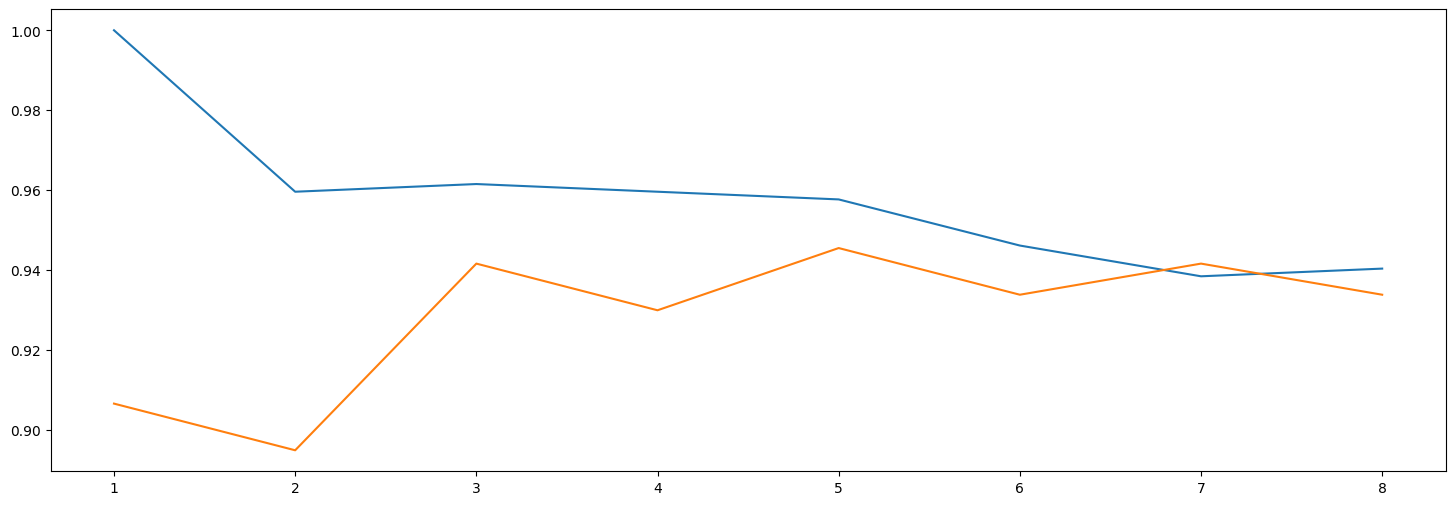

In [43]:
plt.figure(figsize=(18, 6))
plt.plot(range(1, 9), KN_train)
plt.plot(range(1, 9), KN_test)
plt.show()

In [44]:
models = {
    'LR'    : LogisticRegression(),
    'SVC'   : SVC(probability=True),
    'NAIVE' : GaussianNB(),
    'DT'    : DecisionTreeClassifier(),
    'RF'    : RandomForestClassifier(n_estimators=50, n_jobs=-1),
    'Ada'   : AdaBoostClassifier(estimator=LogisticRegression()),
    'GBS'   : GradientBoostingClassifier(),
}

In [45]:
for name, model in models.items():
    model.fit(x_train, y_train)
    print(f"________________________________{name}________________________________")
    print(f"Train score   : {model.score(x_train, y_train)}")
    print(f"Test  score   : {model.score(x_test, y_test)}")

________________________________LR________________________________
Train score   : 0.95
Test  score   : 0.9221789883268483
________________________________SVC________________________________
Train score   : 0.9596153846153846
Test  score   : 0.9260700389105059
________________________________NAIVE________________________________
Train score   : 0.7923076923076923
Test  score   : 0.7898832684824902
________________________________DT________________________________
Train score   : 1.0
Test  score   : 0.867704280155642
________________________________RF________________________________
Train score   : 1.0
Test  score   : 0.8949416342412452
________________________________Ada________________________________
Train score   : 0.9230769230769231
Test  score   : 0.8910505836575876
________________________________GBS________________________________
Train score   : 1.0
Test  score   : 0.8949416342412452


# `XGBoost`

In [46]:
XGB_model = XGBClassifier(n_estimators=30, n_jobs=-1)
XGB_model.fit(x_train, y_train)
print(f"Train score   : {XGB_model.score(x_train, y_train)}")
print(f"Test  score   : {XGB_model.score(x_test, y_test)}")

Train score   : 1.0
Test  score   : 0.8910505836575876


## `Bagging`

In [47]:
bagging = BaggingClassifier(base_estimator=LogisticRegression(), n_jobs=-1)
bagging.fit(x_train, y_train)
print(f"train score : {bagging.score(x_train, y_train)}")
print(f"test  score : {bagging.score(x_test, y_test)}")

C:\Users\shehab\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


train score : 0.9403846153846154
test  score : 0.914396887159533


## `Hard voting`

In [48]:
clf1 = LogisticRegression()
clf2 = KNeighborsClassifier()
clf3 = SVC(probability=True)
clf4 = DecisionTreeClassifier()
clf5 = RandomForestClassifier()
clf6 = GaussianNB()

vclf = VotingClassifier(estimators=[('LOR', clf1), ('KNN', clf2), ('SVC', clf3), 
                                    ('DT', clf4), ('RF', clf5), ('GN', clf6)], voting="hard")

vclf.fit(x_train, y_train)

y_pred = vclf.predict(x_test)
print(f"train score: {vclf.score(x_train, y_train)}")
print(f"test  score: {vclf.score(x_test, y_test)}")

train score: 0.9769230769230769
test  score: 0.914396887159533


# `Soft voting`

In [49]:
vclf = VotingClassifier(estimators=[('LOR', clf1), ('KNN', clf2), ('SVC', clf3), 
                                    ('DT', clf4), ('RF', clf5), ('GN', clf6)], voting="soft")

vclf.fit(x_train, y_train)

y_pred = vclf.predict(x_test)
print(f"train score: {vclf.score(x_train, y_train)}")
print(f"test  score: {vclf.score(x_test, y_test)}")

train score: 0.9846153846153847
test  score: 0.9299610894941635
